# Density based spatial clustering with noise (DBSCAN)

Epsilon: radius
MinPTS: Core / Border / Noise

Points in circle >= minPTS : Core  
Points in circle < minPTS && contains atleast one core point : Border  
None : Noise -- Not Considered

Value of Epsilon MinPTS???
- Area of research
- standard methods
    - minPTS >= 3
    - minPTS >= dimention + 1 | if we have large amount of dimentions
    - minPTS >= 2(dimention)  | if we have less amount of dimentions

    - E = KNearest | similar to elbow point in KNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./datasets/Mall_Customers_cluster.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
X = data.iloc[:, [3, 4]].values

In [27]:
from sklearn.metrics import silhouette_score

In [45]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=5, min_samples=4)
Y = model.fit_predict(X)
np.unique(Y)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [46]:
silhouette_score(X, Y)

0.13799244650401032

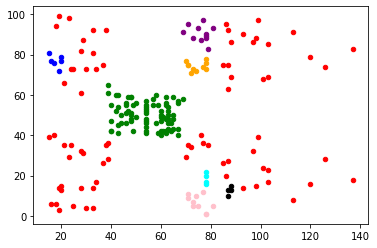

In [48]:
color = ['red', 'blue', 'green', 'orange', 'pink', 'purple', 'cyan', 'black']
colorI = 0
for i in np.unique(Y):
    plt.scatter(X[Y==i,0], X[Y==i,1], c=color[colorI], s=20, label='Cluster {i}')
    colorI += 1


In [49]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=10, min_samples=4)
Y = model.fit_predict(X)
np.unique(Y)

array([-1,  0,  1,  2], dtype=int64)

In [50]:
silhouette_score(X, Y)

0.39889488555584734

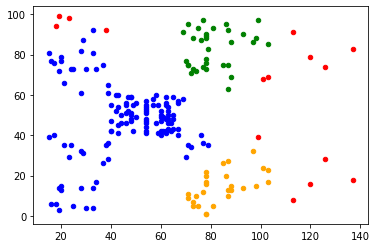

In [51]:
color = ['red', 'blue', 'green', 'orange', 'pink', 'purple', 'cyan', 'lime']
colorI = 0
for i in np.unique(Y):
    plt.scatter(X[Y==i,0], X[Y==i,1], c=color[colorI], s=20, label='Cluster {i}')
    colorI += 1


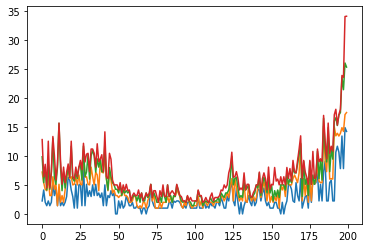

In [59]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=4).fit(X)
dis, indices = nn.kneighbors(n_neighbors=4)
plt.plot(dis)

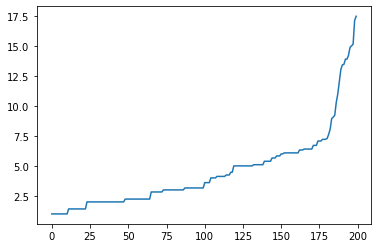

In [60]:
distance = np.sort(dis, axis=0)
distance = distance[:,1]
plt.plot(distance)

# Principal Component Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('./datasets/Mall_Customers_cluster.csv')

In [5]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data['Genre'] = en.fit_transform(data['Genre'])
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [7]:
X = data.drop('CustomerID', axis=1)
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(X)

In [49]:
pca.explained_variance_ratio_

array([0.45118077, 0.44091539])

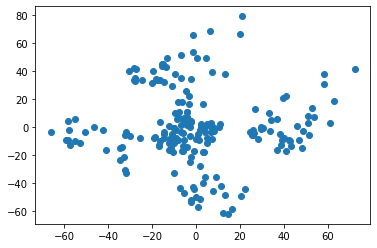

In [50]:
plt.scatter(x_new[:,0], x_new[:,1])

In [51]:
from sklearn.metrics import silhouette_score

In [52]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=0)
Y = model.fit_predict(x_new)
silhouette_score(x_new, Y)

c:\Users\Nakum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5526264331833407

In [53]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=16, min_samples=4)
Y = model.fit_predict(x_new)
silhouette_score(x_new, Y)

0.4219338535504281

In [55]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_new1 = std.fit_transform(X)

In [62]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_new1)
pca.explained_variance_ratio_ # sum should be near to 90 / 95

array([0.33690046, 0.26230645, 0.23260639])